In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
max = 21
min = 1

def readFileAsArr(fileName, num):
    res = []
    file = open('./data/fast/' + fileName, encoding="utf8").read()
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([num, int(splitLine[0]), int(splitLine[1]), int(splitLine[2]), int(splitLine[3]), float(splitLine[4])])
    return res

results = []
for i in range(min, max):
    results = results + readFileAsArr('bench_' + str(i) + '.txt', i)

In [118]:
df = pd.DataFrame(results, columns=['benchNum', 'version', 'id', 'beginTime', 'endTime', 'latency'])

In [119]:
df.describe()

,benchNum,version,id,beginTime,endTime,latency
count,7551.000000,7551.000000,7551.000000,7.551000e+03,7.551000e+03,7551.000000
mean,10.535426,1.794994,188.510131,1.630677e+18,1.630677e+18,2008.922439
std,5.759602,0.403733,109.426147,1.066912e+12,1.066885e+12,4392.704047
min,1.000000,1.000000,0.000000,1.630675e+18,1.630675e+18,3.763608
25%,6.000000,2.000000,94.000000,1.630676e+18,1.630676e+18,5.210591
50%,11.000000,2.000000,188.000000,1.630677e+18,1.630677e+18,5.600582
75%,16.000000,2.000000,283.000000,1.630678e+18,1.630678e+18,16.177532
max,20.000000,2.000000,419.000000,1.630678e+18,1.630678e+18,19835.674575


In [120]:
firstMsgLatencies = []
df_filtered = []
for i in range(min, max):
    # ensure no duplicates and no lost message (i.e. checking for duplicate IDs, missing IDs)
    df_bench = df[df['benchNum'] == i].reset_index()
    msg_ids = df_bench['id']
    msg_ids = msg_ids.sort_values(ascending=True).values
    for j in range(1, len(msg_ids)):
        if msg_ids[j] == msg_ids[j - 1]:
            print("DUPLICATE FOUND")
        elif msg_ids[j] > (msg_ids[j-1] + 1):
            print("MESSAGE(s) LOST")
    
    firstMsgRow = df_bench[df_bench["version"] == 2].head(1)
    firstMsgLatencies.append(firstMsgRow["latency"].values[0])
    transIdx = firstMsgRow.index.values[0]
    filtered_rows = df_bench.iloc[(transIdx - 50):(transIdx + 200)].copy()
    minEndTime = filtered_rows["endTime"].min()
    filtered_rows["relativeEnd"] = (filtered_rows["endTime"] - minEndTime) / 1000000000
    df_filtered.append(filtered_rows)
    
print("average time: " + str(np.mean(firstMsgLatencies)))
print("median time: " + str(np.median(firstMsgLatencies)))


average time: 16731.149403900003
median time: 16583.413417


In [121]:
resDf = pd.concat(df_filtered, sort=False)

In [122]:
resDf.head()

,index,benchNum,version,id,beginTime,endTime,latency,relativeEnd
30,30,1,1,30,1630674767430402060,1630674767435771245,5.369185,0.000000
31,31,1,1,31,1630674767631428643,1630674767637013969,5.585326,0.201243
32,32,1,1,32,1630674767832564965,1630674767838684181,6.119216,0.402913
33,33,1,1,33,1630674768033826144,1630674768040001133,6.174989,0.604230
34,34,1,1,34,1630674768235061160,1630674768240458049,5.396889,0.804687


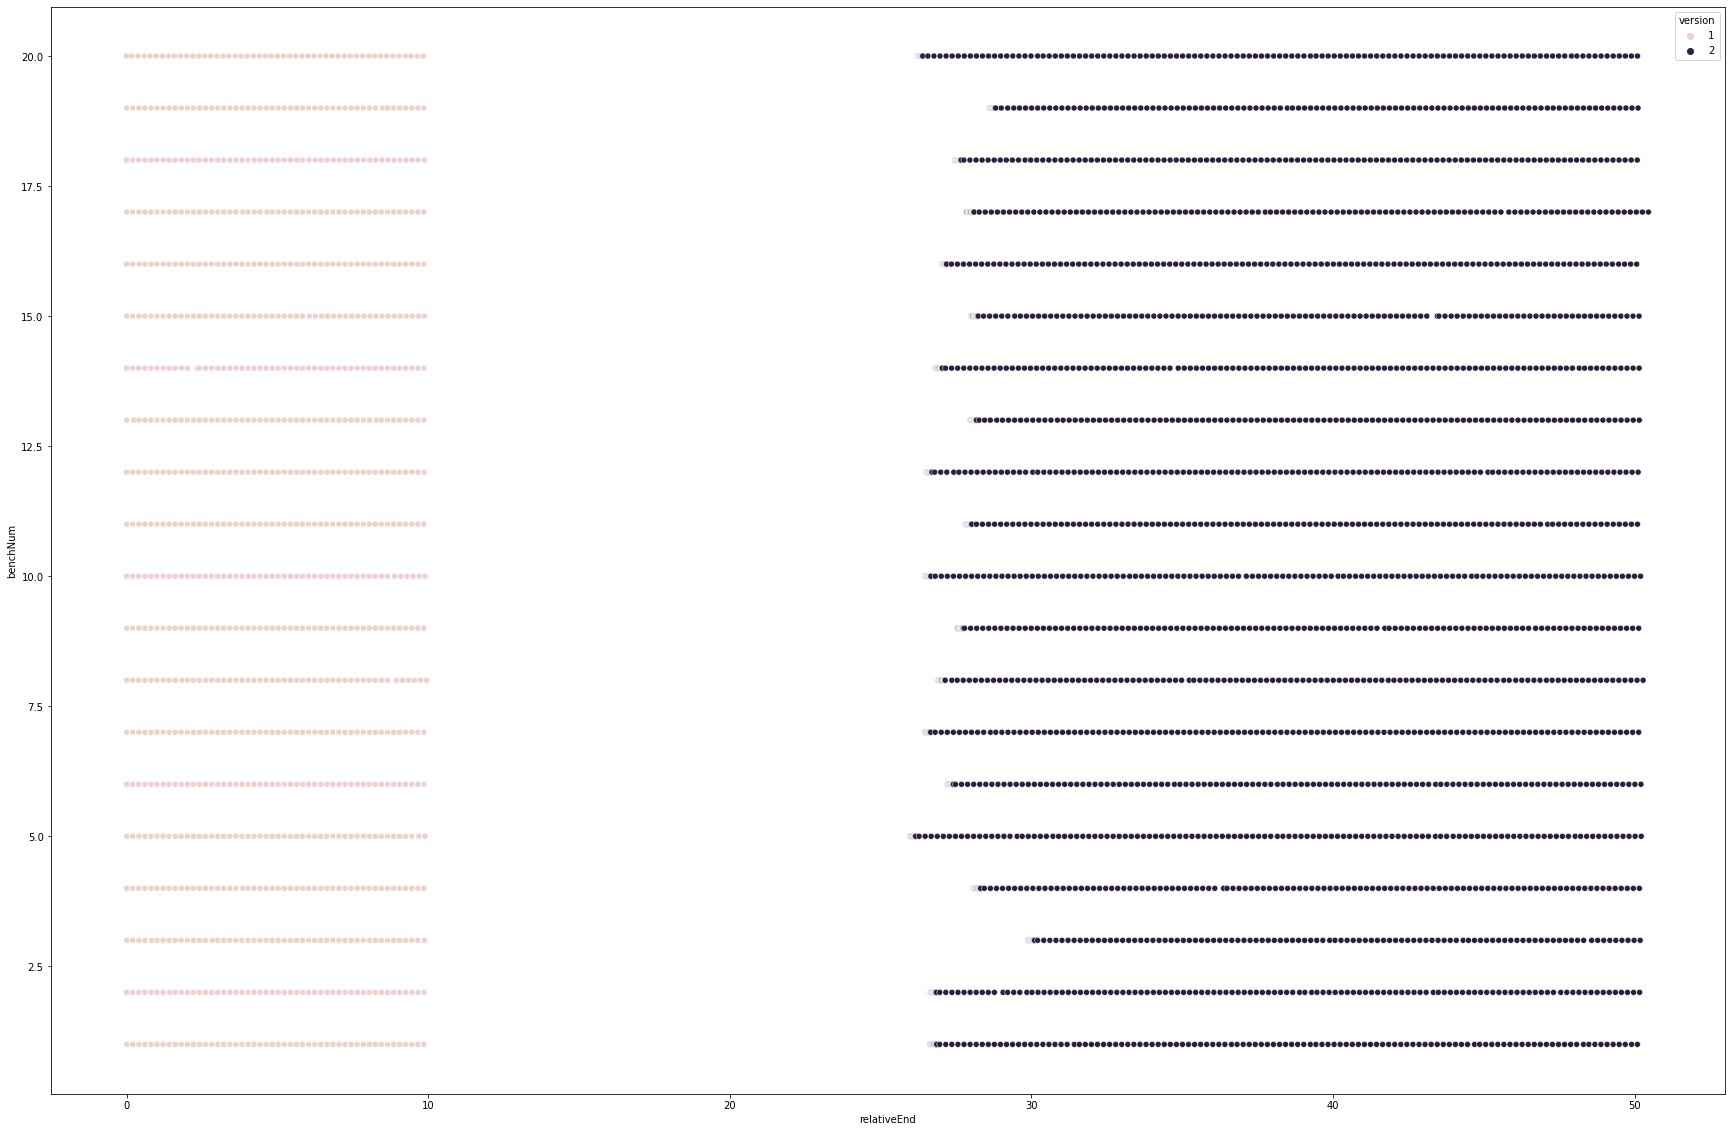

In [131]:
fix, ax = plt.subplots(figsize=(30,20))
ax = sns.scatterplot(data=resDf, x="relativeEnd", y="benchNum", hue="version")


,benchNum,version,id,beginTime,endTime,latency
0,1,1,0,1630674761393793043,1630674761406126501,12.333458
1,1,1,1,1630674761597533247,1630674761603714659,6.181412
2,1,1,2,1630674761798679753,1630674761804905502,6.225749
3,1,1,3,1630674761999925459,1630674762005613347,5.687888
4,1,1,4,1630674762200918396,1630674762205649058,4.730662
...,...,...,...,...,...,...
145,1,2,147,1630674790964251832,1630674794252111737,3287.859905
146,1,2,140,1630674789556738962,1630674794254509017,4697.770055
147,1,2,148,1630674791165420117,1630674794257480649,3092.060532
148,1,2,150,1630674791576325032,1630674794258171893,2681.846861
